In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# <img style="float: left; padding: 0px 10px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"  width="80" /> MCD3020 - Introducción a Ciencia de Datos

## Tutorial 14: Algoritmos de Clasificación.


## 1. Introducción.

Este tutorial tiene como objetivo demostrar algunos algoritmos sencillos de clasificación utilizando la librería `sklearn`.<br>

Los métodos de clasificación corresponden a algortimos de aprendizaje supervisado que permiten predecir el valor de una variable categórica a partir de un conjunto de variables predictoras, que a su vez pueden ser numéricas o categóricas.

## 2. Clasificación k-NN

###  Clasificación binaria con normalización.

En este ejemplo, usaremos un dataset de RRSS (https://www.kaggle.com/datasets/rakeshrau/social-network-ads) para predecir si una persona realiza o no una compra luego de hacer click en un aviso publicitario en la red. Para ello, se requiere entrenar un modelo que clasifique a cada usuario en la categoría correcta (compra o no compra)  en base a sus características (edad, género, salario).

Como predictores, utilizaremos la edad y salario estimado del usuario.

Primero, entrenaremos un clasificador kNN, ver la documentación en el siguiente link: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


## Datos de entrenamiento y prueba:

In [3]:
from sklearn.model_selection import train_test_split

#seleccionamos las variables predictoras y la variable dependiente
X = df[['Age','EstimatedSalary']]
y = df['Purchased']

#datos de entrenamiento y prueba

X_train, X_test,y_train,  y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)


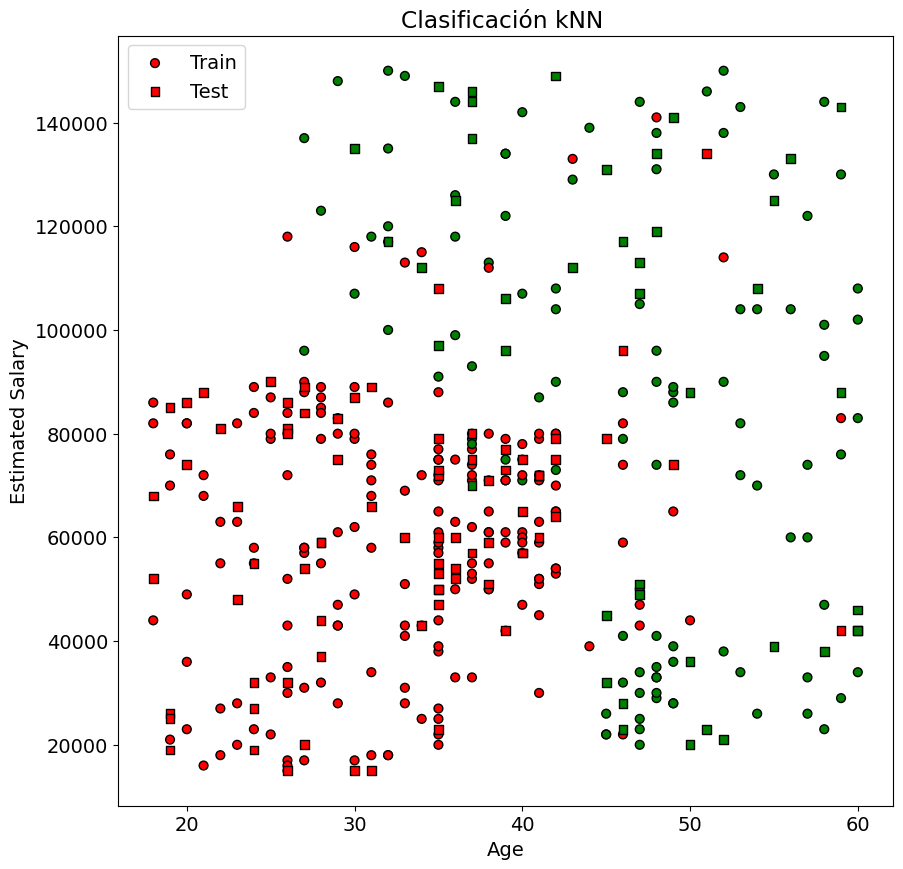

In [4]:
#visualizemos los datos de entrenamiento y prueba

from matplotlib.colors import ListedColormap

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)

#plot de los datos de entrenamiento (verde=Compra, rojo=NoCompra)
ax.scatter(X_train['Age'],X_train['EstimatedSalary'],c=y_train,s=40,edgecolors='k',cmap=ListedColormap(('red', 'green')),label='Train')
ax.scatter(X_test['Age'],X_test['EstimatedSalary'],c=y_test,marker='s',s=40,edgecolors='k',cmap=ListedColormap(('red', 'green')),label='Test')

ax.legend();
ax.set_title('Clasificación kNN ')
ax.set_xlabel('Age')
ax.set_ylabel('Estimated Salary');

## Estandarización de variables: 
El algoritmo kNN se basa en el cálculo de distancias entre puntos de datos, de manera de identificar los vecinos más cercanos a un determinado punto. Cuando existe más de una variable predictora, con distintos rangos de valores, se introducen efectos de escala en el cálculo de distancias, por lo que es necesario estandarizar las variables.

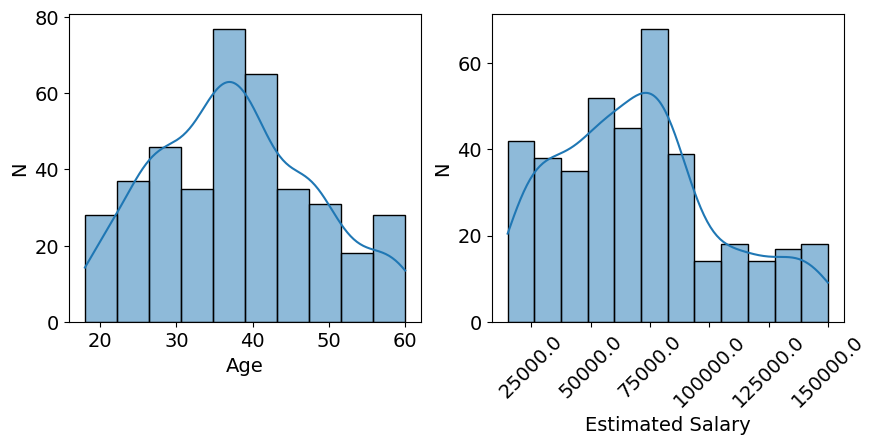

In [5]:
#veamos la distribución de valores originales
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
sns.histplot(ax=ax1,data=X,x='Age',kde=True)
ax1.set_xlabel('Age')
ax1.set_ylabel('N')

sns.histplot(ax=ax2,data=X,x='EstimatedSalary',kde=True)
ax2.set_xlabel('Estimated Salary')
ax2.set_ylabel('N')
ax2.set_xticklabels(ax2.get_xticks(),rotation=45);

In [6]:
from sklearn.preprocessing import StandardScaler

#estandarizacion con StandardScaler
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train) #esto genera un np.array
X_test_sc = sc.transform(X_test)

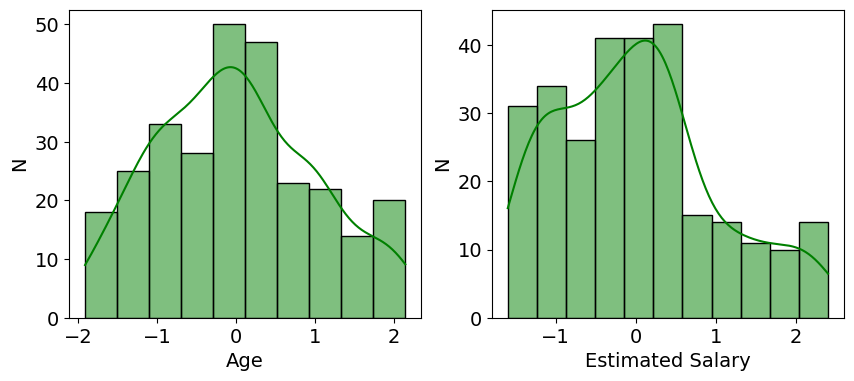

In [7]:
#veamos la distribución de valores normalizados
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
sns.histplot(ax=ax1,data=X_train_sc[:,0],kde=True,color='green')
ax1.set_xlabel('Age')
ax1.set_ylabel('N')

sns.histplot(ax=ax2,data=X_train_sc[:,1],kde=True,color='green')
ax2.set_xlabel('Estimated Salary')
ax2.set_ylabel('N')
fig.savefig('scaled.png',dpi=300,bbox_inches='tight')

## Entrenamiento del clasificador kNN:

In [8]:
from sklearn.neighbors import  KNeighborsClassifier

#definimos el modelo y especificamos sus hiperparámetros (primero, un valor arbitrario de k)
classifier = KNeighborsClassifier(n_neighbors = 15)

#ajustamos a los datos de entrenamiento
classifier.fit(X_train_sc, y_train);


In [9]:
#predecimos las categorías para el dataset de prueba
y_pred_test = classifier.predict(X_test_sc)
y_pred_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1])

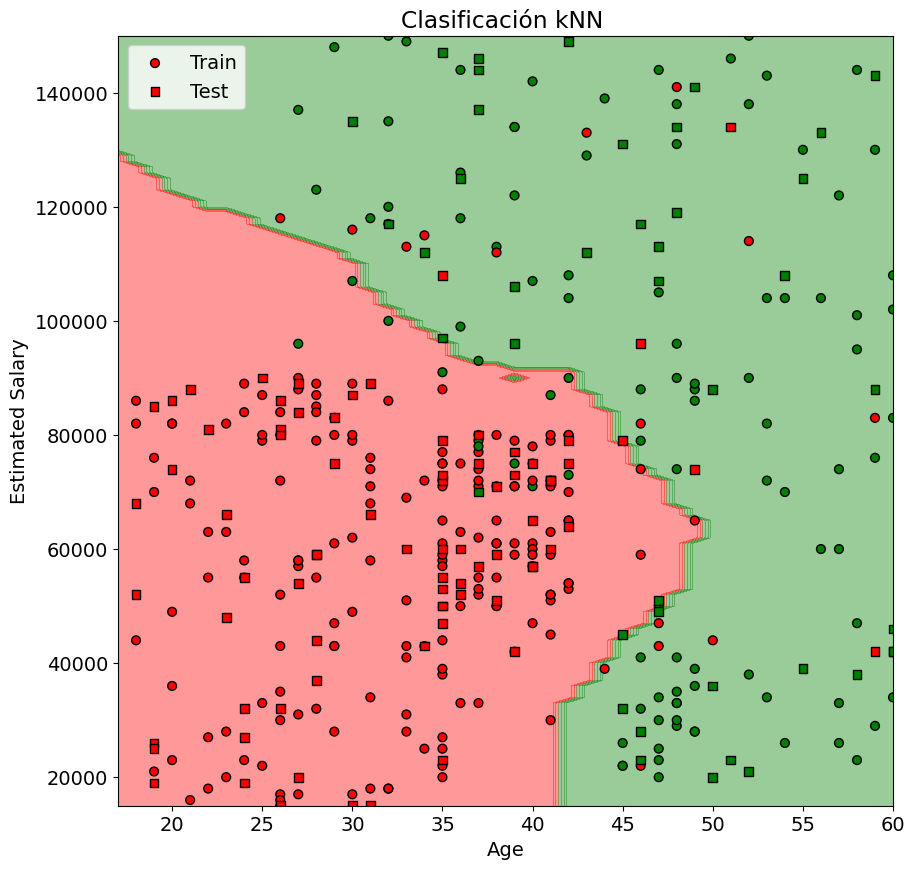

In [10]:
#visualizemos los resultados

from matplotlib.colors import ListedColormap

#creamos una grilla con valores de X1 (Age) y X2 (EstimatedSalary)
X1, X2 = np.meshgrid(np.arange(X_train['Age'].min()-1, X_train['Age'].max()+1,1),
                     np.arange(X_train['EstimatedSalary'].min()-1,X_train['EstimatedSalary'].max()+1,1000))


#predecimos la clase de salida para cada par de puntos (X1,X2) de la grilla
#X1, X2 son matrices con los valores en cada punto de la grilla. 

#X1.ravel() son las versiones "flattened". Para la predicción, transformamos X1, X2 en vectores
# luego con reshape volvemos a darle la forma de matrix (grilla) al vector de resultados
X_grid=np.array([X1.ravel(), X2.ravel()]).T

X_grid_sc=sc.transform(X_grid)
y_grid=classifier.predict(X_grid_sc).reshape(X1.shape)

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)

#grafico de contornos de mesh_predict, para visualizar la frontera entre las dos clases
im=ax.contourf(X1, X2, y_grid, alpha = 0.4, cmap = ListedColormap(('red', 'green')))

#plot de los datos de entrenamiento
ax.scatter(X_train['Age'],X_train['EstimatedSalary'],c=y_train,s=40,edgecolors='k',cmap=ListedColormap(('red', 'green')),label='Train')
ax.scatter(X_test['Age'],X_test['EstimatedSalary'],c=y_test,marker='s',s=40,edgecolors='k',cmap=ListedColormap(('red', 'green')),label='Test')

ax.legend();
ax.set_title('Clasificación kNN ')
ax.set_xlabel('Age')
ax.set_ylabel('Estimated Salary');



## ¿Qué tan buena resultó la clasificación?

Para evaluar la calidad de la clasificación, calculamos la matriz de confusión y las métricas de rendimiento considerando las predicciones y clases reales de los datos de prueba.

Estas métricas están implementadas en el módulo `sklearn.metrics`.

Confusion matrix: [[72  6]
 [ 3 39]]
Accuracy: 0.925
Recall: 0.9285714285714286
Precision: 0.8666666666666667
F score: 0.896551724137931
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        78
           1       0.87      0.93      0.90        42

    accuracy                           0.93       120
   macro avg       0.91      0.93      0.92       120
weighted avg       0.93      0.93      0.93       120



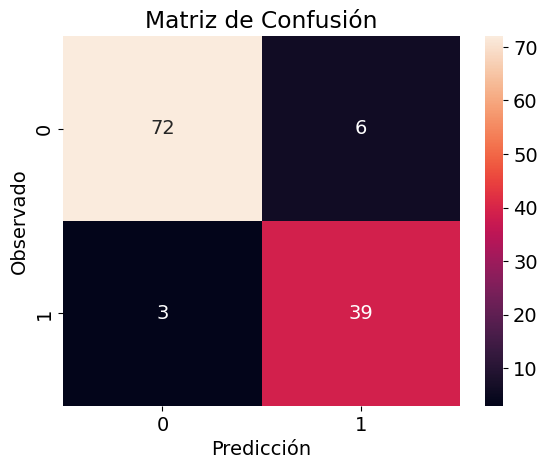

In [11]:
from sklearn import metrics

#matriz de confusión
cm=metrics.confusion_matrix(y_test,y_pred_test) #true,pred
print('Confusion matrix:',cm)

#graficamos la matriz de confusión
sns.heatmap(cm,annot=True)
plt.ylabel('Observado')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')

#también podemos calcular las métricas en forma individual
accuracy=metrics.accuracy_score(y_test,y_pred_test)
print('Accuracy:',accuracy) 

recall=metrics.recall_score(y_test,y_pred_test)
print('Recall:',recall)

precision=metrics.precision_score(y_test,y_pred_test)
print('Precision:',precision) 

fscore=metrics.f1_score(y_test,y_pred_test)
print('F score:',fscore)

#también podemos imprimir un resumen de las métricas de clasificación
report0=metrics.classification_report(y_test,y_pred_test)
print(report0)

## ¿Cómo cambia la clasificación para distintos valores de k?

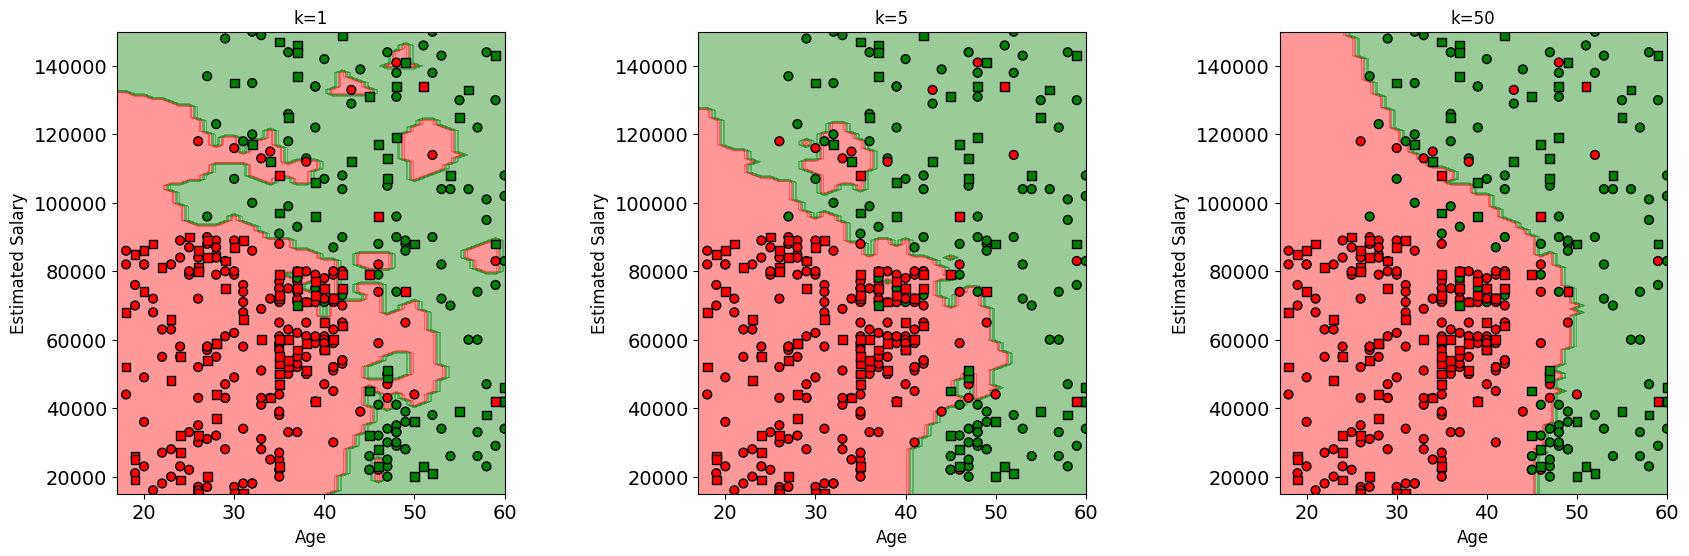

In [12]:
fig=plt.figure(figsize=(20,6))

accuracy_train=[]
accuracy_test=[]

ks=[1,5,50]
for nk,k in enumerate(ks):
    
    #definimos el clasificador y ajustamos a los datos de entrenamiento
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    classifier.fit(X_train_sc, y_train)
    
    #Gráficos
    #creamos una grilla con valores de X1 (Age) y X2 (EstimatedSalary)
    X1, X2 = np.meshgrid(np.arange(X_train['Age'].min()-1, X_train['Age'].max()+1,1),
                     np.arange(X_train['EstimatedSalary'].min()-1,X_train['EstimatedSalary'].max()+1,1000))

    X_grid=np.array([X1.ravel(), X2.ravel()]).T
    X_grid_sc=sc.transform(X_grid)
    y_grid=classifier.predict(X_grid_sc).reshape(X1.shape)

    ax=fig.add_subplot(1,3,nk+1)

    #grafico de contornos de mesh_predict, para visualizar la frontera entre las dos clases
    im=ax.contourf(X1, X2, y_grid, alpha = 0.4, cmap = ListedColormap(('red', 'green')))

    #plot de los datos de entrenamiento
    ax.scatter(X_train['Age'],X_train['EstimatedSalary'],c=y_train,s=40,edgecolors='k',cmap=ListedColormap(('red', 'green')),label='Train')
    ax.scatter(X_test['Age'],X_test['EstimatedSalary'],c=y_test,marker='s',s=40,edgecolors='k',cmap=ListedColormap(('red', 'green')),label='Test')


    ax.set_title('k=%d'%k,fontsize=12)
    ax.set_xlabel('Age',fontsize=12)
    ax.set_ylabel('Estimated Salary',fontsize=12)

    #ax.legend();
plt.subplots_adjust(wspace=0.5)

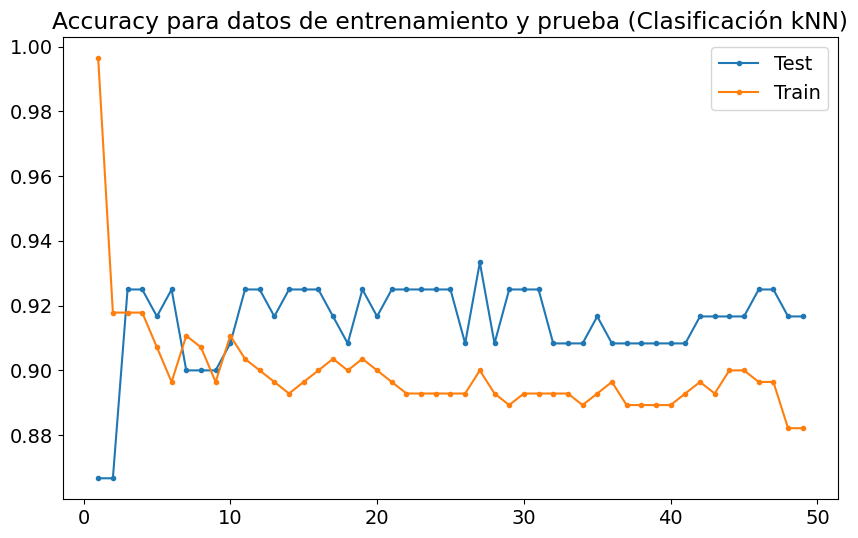

In [13]:
accuracy_train=[]
accuracy_test=[]

ks=np.arange(1,50,1)
for nk,k in enumerate(ks):
    
    #definimos el clasificador y ajustamos a los datos de entrenamiento
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    classifier.fit(X_train_sc, y_train)

    #predicción para datos de entrenamiento y prueba
    y_pred_train=classifier.predict(X_train_sc)
    y_pred_test=classifier.predict(X_test_sc)
    
    accuracy_test.append(metrics.accuracy_score(y_test,y_pred_test))
    accuracy_train.append(metrics.accuracy_score(y_train,y_pred_train))

    
    
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
ax.plot(ks,accuracy_test,'.-',label='Test')
ax.plot(ks,accuracy_train,'.-',label='Train')
ax.set_title('Accuracy para datos de entrenamiento y prueba (Clasificación kNN)')
ax.legend();

## 3. Árboles de decisión.

In [14]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [15]:
df['Gender']=df['Gender'].map({'Female':1,'Male':0})

In [16]:
from sklearn.model_selection import train_test_split

#seleccionamos las variables predictoras y la variable dependiente
X = df[['Age','EstimatedSalary','Gender']]
y = df['Purchased']

#datos de entrenamiento y prueba
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size = 0.3)


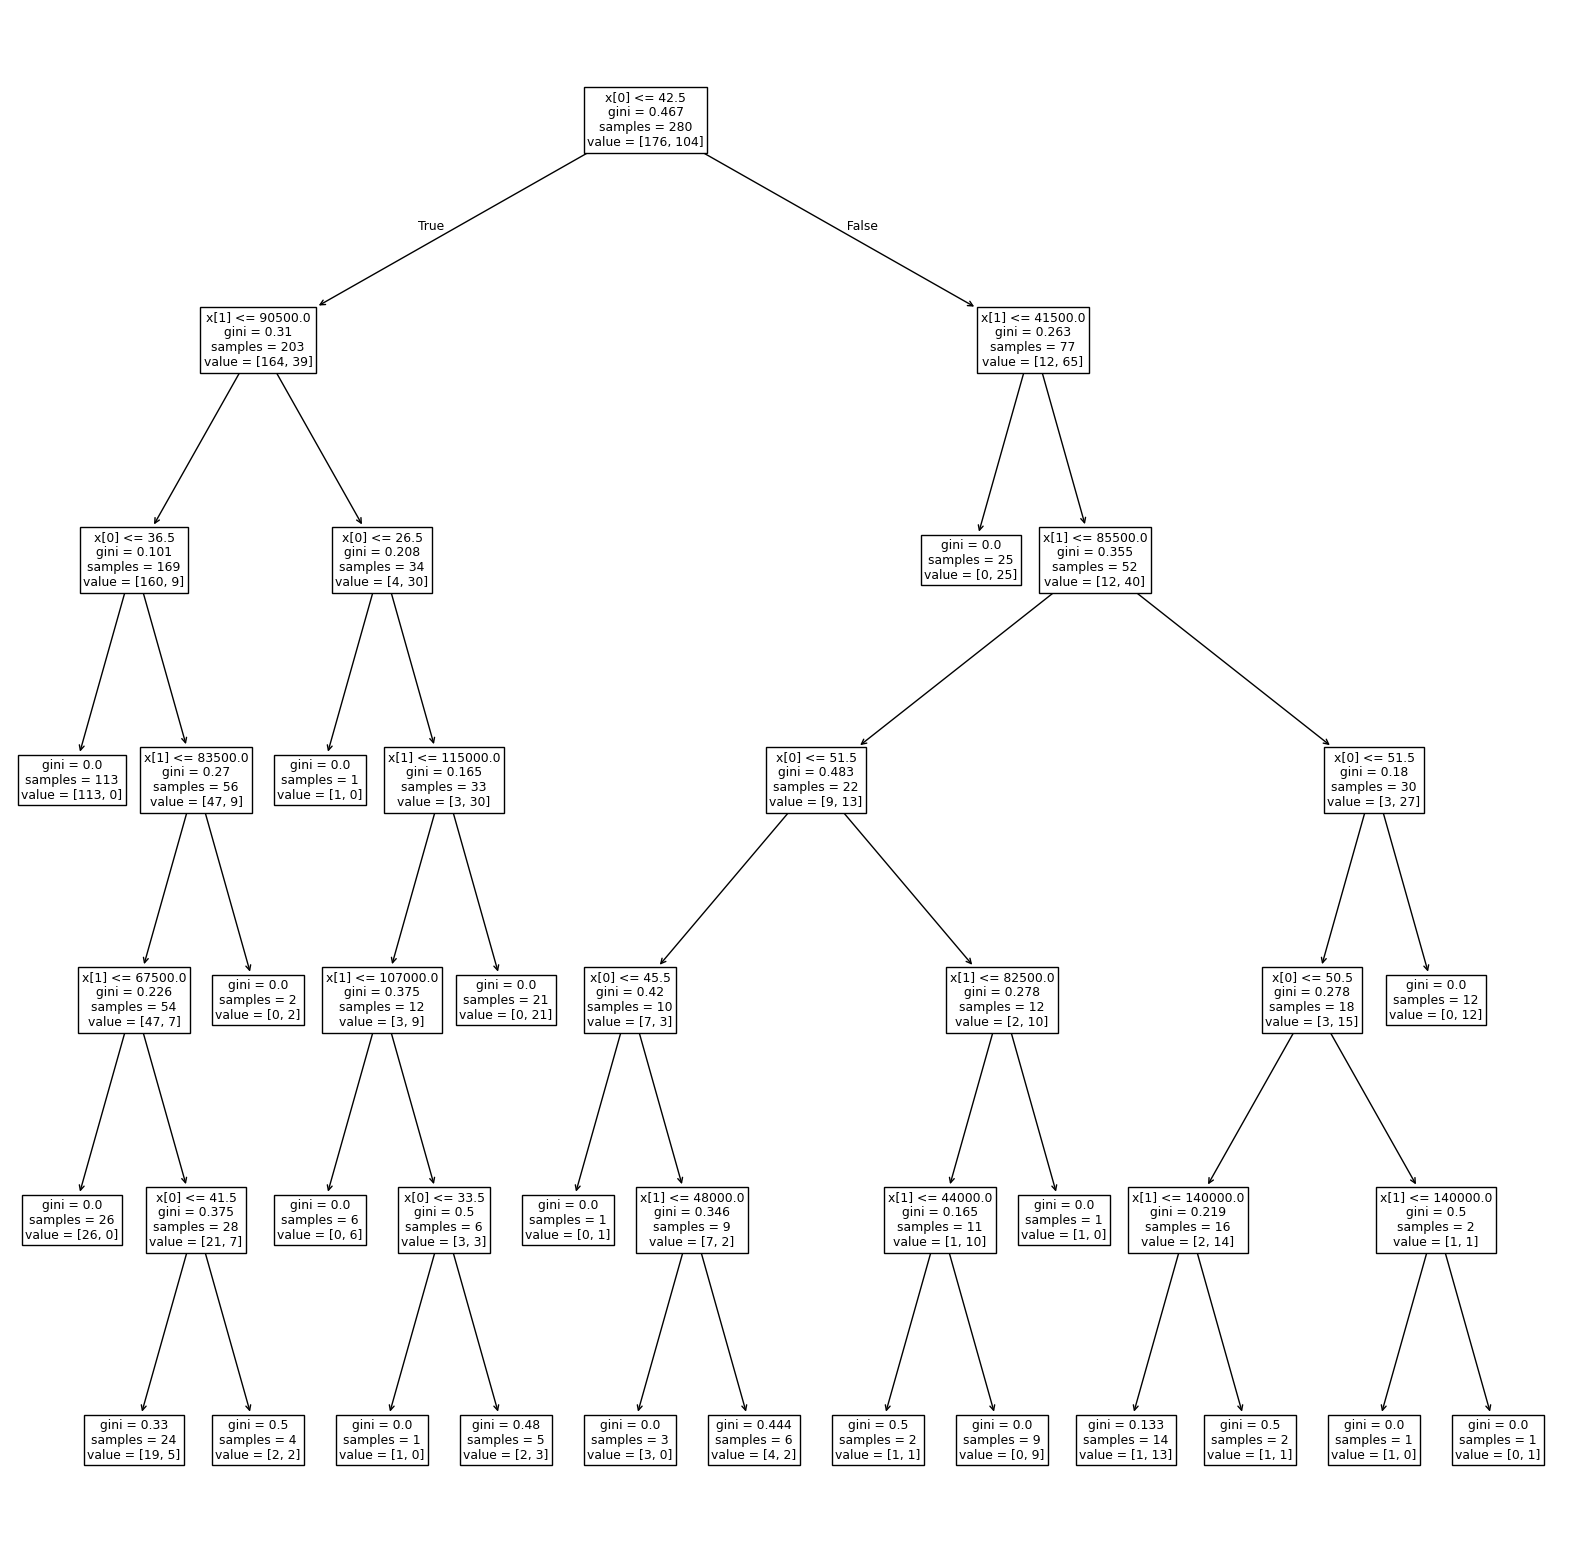

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

#definimos el modelo y especificamos sus hiperparámetros
classifier = DecisionTreeClassifier(max_depth=6)

#ajustamos a los datos de entrenamiento
classifier.fit(X_train, y_train)

#graficamos el árbol
fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(111)
plot_tree(classifier,ax=ax);

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        81
           1       0.80      0.85      0.82        39

    accuracy                           0.88       120
   macro avg       0.86      0.87      0.87       120
weighted avg       0.89      0.88      0.88       120



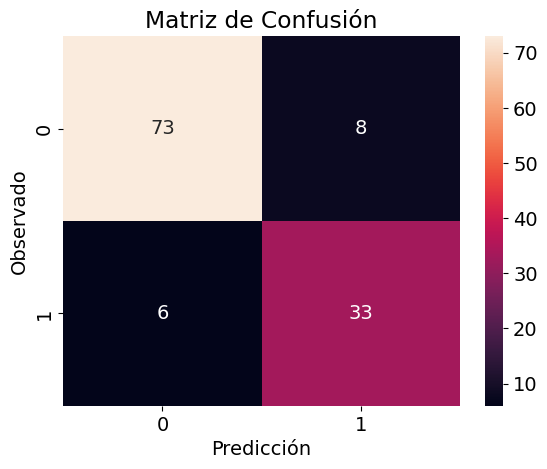

In [19]:
#predecimos las categorías para el dataset de prueba
y_pred_test = classifier.predict(X_test)

from sklearn import metrics

#matriz de confusión
cm=metrics.confusion_matrix(y_test,y_pred_test) #true,pred

#graficamos la matriz de confusión
sns.heatmap(cm,annot=True)
plt.ylabel('Observado')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')

#también podemos imprimir un resumen de las métricas de clasificación
report0=metrics.classification_report(y_test,y_pred_test)
print(report0)

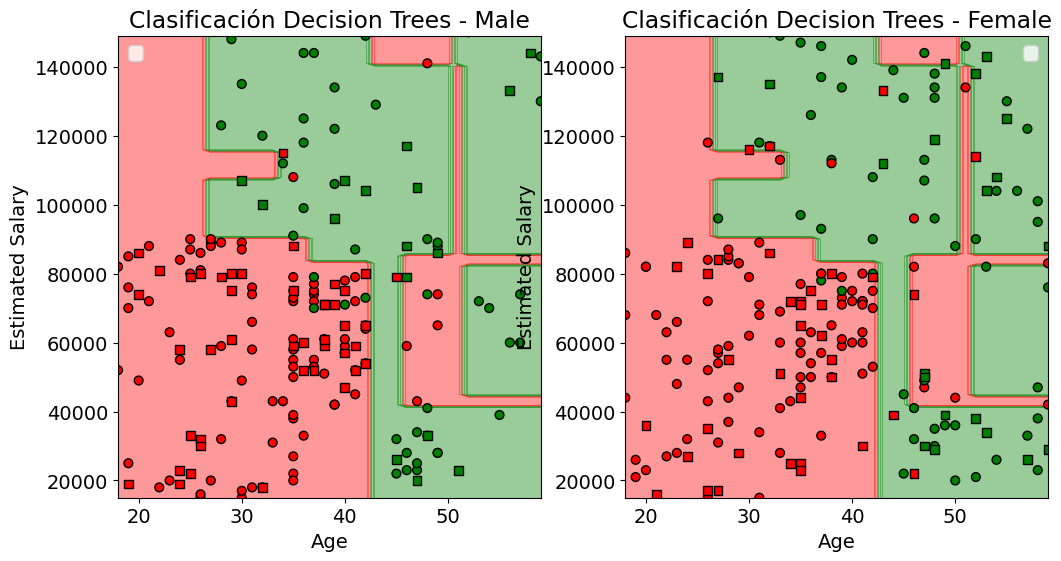

In [20]:
#visualizemos los resultados

from matplotlib.colors import ListedColormap

fig=plt.figure(figsize=(12,6))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

#creamos una grilla con valores de X1 (Age) y X2 (EstimatedSalary)
X1, X2 = np.meshgrid(np.arange(X_train.Age.min(), X_train.Age.max(),1),
                     np.arange(X_train.EstimatedSalary.min(),X_train.EstimatedSalary.max(),1000))

X3_male=np.zeros(len(X1.ravel()))#male
X3_female=np.ones(len(X1.ravel()))#male

#male
X_grid=np.array([X1.ravel(), X2.ravel(),X3_male]).T  
y_grid=classifier.predict(X_grid).reshape(X1.shape)

im=ax1.contourf(X1, X2, y_grid, alpha = 0.4, cmap = ListedColormap(('red', 'green')))

#female
X_grid=np.array([X1.ravel(), X2.ravel(),X3_female]).T  
y_grid=classifier.predict(X_grid).reshape(X1.shape)
im=ax2.contourf(X1, X2, y_grid, alpha = 0.4, cmap = ListedColormap(('red', 'green')))


for ax in [ax1,ax2]:

    ax.set_xlim(X1.min(), X1.max())
    ax.set_ylim(X2.min(), X2.max())
    ax.set_xlabel('Age')
    ax.set_ylabel('Estimated Salary')
    ax.legend()
  
ax1.scatter(X_train[X_train['Gender']==0].Age,X_train[X_train['Gender']==0].EstimatedSalary,c=y_train[X_train['Gender']==0],s=40,edgecolors='k',cmap=ListedColormap(('red', 'green')),label='Train')
ax1.scatter(X_test[X_test['Gender']==0].Age,X_test[X_test['Gender']==0].EstimatedSalary,c=y_test[X_test['Gender']==0],marker='s',s=40,edgecolors='k',cmap=ListedColormap(('red', 'green')),label='Test')

ax2.scatter(X_train[X_train['Gender']==1].Age,X_train[X_train['Gender']==1].EstimatedSalary,c=y_train[X_train['Gender']==1],s=40,edgecolors='k',cmap=ListedColormap(('red', 'green')),label='Train')
ax2.scatter(X_test[X_test['Gender']==1].Age,X_test[X_test['Gender']==1].EstimatedSalary,c=y_test[X_test['Gender']==1],marker='s',s=40,edgecolors='k',cmap=ListedColormap(('red', 'green')),label='Test')


ax1.set_title('Clasificación Decision Trees - Male')
ax2.set_title('Clasificación Decision Trees - Female');
